## Importing Libraries

In [9]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading in Data (Created in Other .ipynb file)

In [2]:
# read the csv MrBeast/MrBeast_2023-01-17.csv
df = pd.read_csv('MrBeast/MrBeast_2023-01-17.csv')
df.head()

# only keep days since published, views,likes, comments, and duration
df = df[['Days Since Published', 'Views', 'Likes', 'Comments', 'Duration in Minutes']]
df.head()

,Days Since Published,Views,Likes,Comments,Duration in Minutes
0,24,79408982,3533170,133983,12.167
1,38,94497580,4089840,121292,10.417
2,40,457205770,25690316,54637,0.800
3,45,99263866,3018711,90445,15.383
4,59,108386817,7753021,18893,0.683


## Linear Regression

In [5]:
kf = KFold(n_splits=10)
mse_values = []

# Loop through the splits
for train_index, test_index in kf.split(df):
    train_df, test_df = df.iloc[train_index], df.iloc[test_index]
    
    # data sets
    X_train = df.drop(['Views'], axis=1).iloc[train_index]
    X_test = df.drop(['Views'], axis=1).iloc[test_index]
    Y_train = df['Views'].iloc[train_index]
    Y_test = df['Views'].iloc[test_index]
    
    # Create the linear regression model
    lr = LinearRegression()
    
    # Fitting model
    lr.fit(X_train, Y_train)
    
    # Test data predictions
    predictions = lr.predict(X_test)
    
    # Calculate MSE, appending
    mse = mean_squared_error(Y_test, predictions)
    mse_values.append(mse)


mean_rmse_all = np.mean(mse_values) ** (1/2)
print('The RMSE is',mean_rmse_all)

The RMSE is 26763543.216255773


## KNN

In [15]:
# specify the values of the k and distance metric parameters that you want to test
k_values = []
for i in range(1,50,2):
    k_values.append(i)
rmses = []
temp = []

# loop over the folds and the parameter values
for k in k_values:
    for train_index, test_index in kf.split(df):
        # data sets
        X_train = df.drop(['Views'], axis=1).iloc[train_index]
        X_test = df.drop(['Views'], axis=1).iloc[test_index]
        Y_train = df['Views'].iloc[train_index]
        Y_test = df['Views'].iloc[test_index]
        
        # train KNN
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, Y_train)
        
        # predict
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
        temp.append(rmse)
    rmses.append([k, sum(temp)/len(temp)])
    temp = []

In [16]:
# converting to a dataframe
knn_rmse = pd.DataFrame(rmses, columns=['k', 'rmse'])
#min rmse row
knn_rmse[knn_rmse['rmse'] == knn_rmse['rmse'].min()]

,k,rmse
12,25,1.308683e+07


In [18]:
knn_rmse

,k,rmse
0,1,1.738879e+07
1,3,1.493805e+07
2,5,1.414247e+07
3,7,1.367863e+07
4,9,1.353296e+07
5,11,1.316000e+07
6,13,1.314746e+07
7,15,1.317489e+07
8,17,1.317861e+07
9,19,1.314717e+07


Text(0.5, 1.0, 'RMSE vs. k')

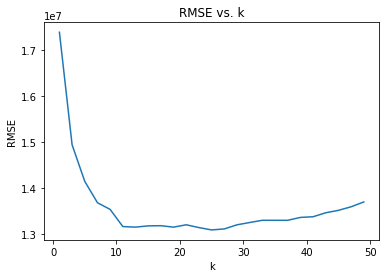

In [17]:
# plotting rmse vs. k
plt.plot(knn_rmse['k'], knn_rmse['rmse'])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k')

The RMSE when using KNN is roughly 13.09 million, which is about half of the error when using linear regression.